In [487]:
import warnings
warnings.filterwarnings("ignore")
import re
import os
import datetime as dt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [488]:
generalData_df      =  pd.read_csv("C:/Users/hp/Desktop/ML_second_pres/general_data.csv")
employee_survey_df  =  pd.read_csv("C:/Users/hp/Desktop/ML_second_pres/employee_survey_data.csv")
manager_survey_df   =  pd.read_csv("C:/Users/hp/Desktop/ML_second_pres/manager_survey_data.csv")
intime_df           =  pd.read_csv("C:/Users/hp/Desktop/ML_second_pres/in_time.csv")
outtime_df          =  pd.read_csv("C:/Users/hp/Desktop/ML_second_pres/out_time.csv")

In [489]:
employee_survey_df

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


In [490]:
df1=pd.merge(generalData_df,employee_survey_df,on='EmployeeID')
final_df=pd.merge(df1,manager_survey_df,on='EmployeeID')

if(len(final_df.columns.tolist())   == (len(generalData_df.columns.tolist()) + len(employee_survey_df.columns.tolist()) + len(manager_survey_df.columns.tolist())) - 2):
  print("OK")

OK


In [491]:
final_df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [492]:
print(final_df.isnull().sum().sum())
final_df.dropna(inplace=True)
print(final_df.isnull().any().sum())

111
0


Checking for duplicates

In [493]:
final_df_dupliactedRows=final_df[final_df.duplicated( keep=False)].shape[0]
if(final_df_dupliactedRows==0):
  print("there is No duplicate elements in Final_df")
else:
  print("there is  duplicate elements in Final_df")
  

there is No duplicate elements in Final_df


# EDA

We will cover how to visually analyze: <br>
Numerical variables with histograms,<br>
Categorical variables with count plots,<br>
Relationships between numerical variables with scatter plots, joint plots, and pair plots, and<br>
Relationships between numerical and categorical variables with box-and-whisker plots and complex conditional plots.<br>

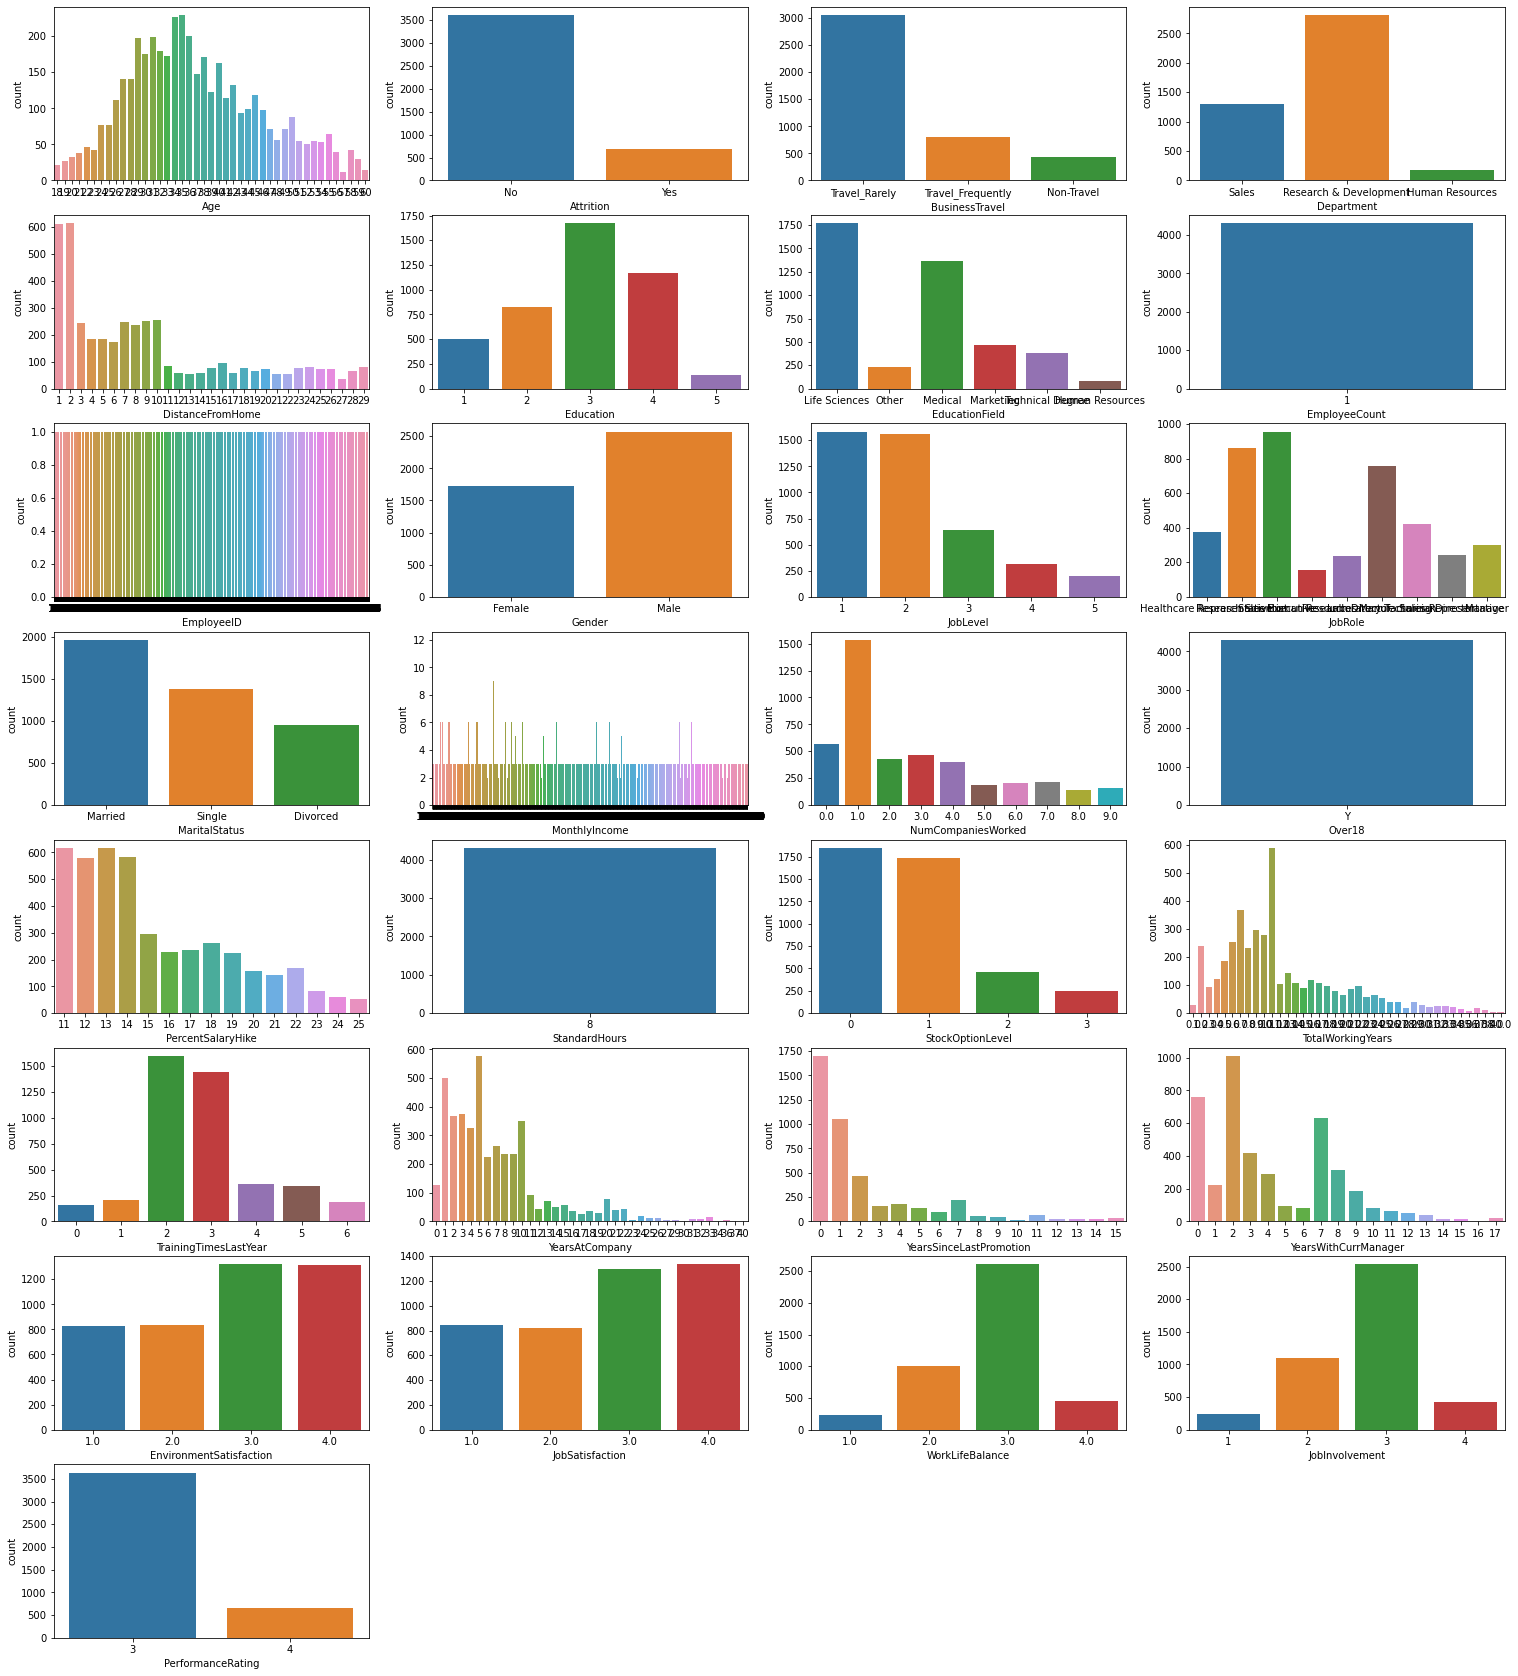

In [191]:
#For all columns doing countplots
fig = plt.figure(figsize=(26,30))
for idx,i in enumerate(final_df.columns.tolist()):
    ax=plt.subplot(8,4,idx+1)
    sns.countplot(x=i,data=final_df,ax=ax)
plt.show()

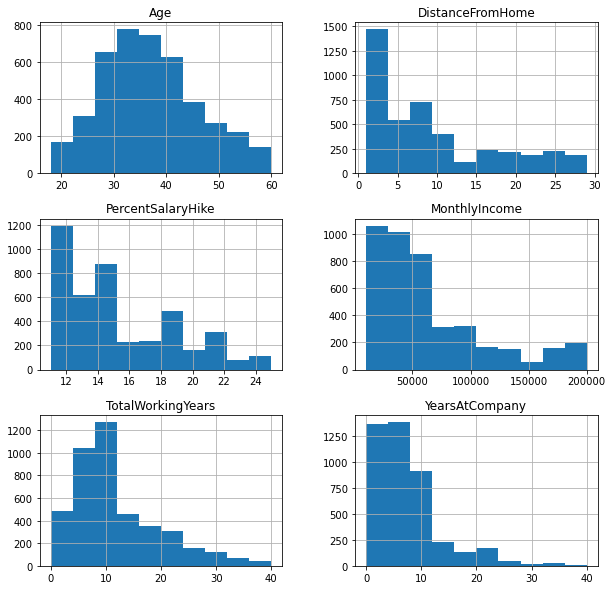

In [192]:
#Divide into NumericalColumns
columns=final_df.columns.tolist()
num_col_eda=['Age','DistanceFromHome','PercentSalaryHike','MonthlyIncome','TotalWorkingYears','YearsAtCompany']
final_df[num_col_eda].hist(figsize=(10,10))
plt.show()

Output ::

1. Key Observation from Above Plot are
   -Except Age most of the Columns are in Skew Distribistion form
   -Age Feature Distribution is almost Normal Distribution
2. As logistic regression does not require independent variables to be normal distributed .so i am not changing distribution of features which are skewed into the normal Distribution

In [323]:
num_attrition=num_col_eda+['Attrition']
education=['Below-College','College','Bachelor','Master','Doctor']
environmentsatisfaction=['Low','Medium','High','Very High']
jobinvolvement=['Low','Medium','High','Very High']
jobsatisfaction=['Low','Medium','High','Very High']
relationshipsatisfaction=['Low','Medium','High','Very High']
performancerating=['Low','Good','Excellent','Outstanding']
worklifebalance=['Bad','Good','Better','Best']

val=[education,environmentsatisfaction,jobinvolvement,jobsatisfaction,performancerating,worklifebalance]
cat1=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','WorkLifeBalance']

cat_col_eda=set(columns) - set(num_col_eda)
cat_col_eda=set(cat_col_eda) - set(cat1)
fig = plt.figure(figsize=(16,20))

<Figure size 1152x1440 with 0 Axes>

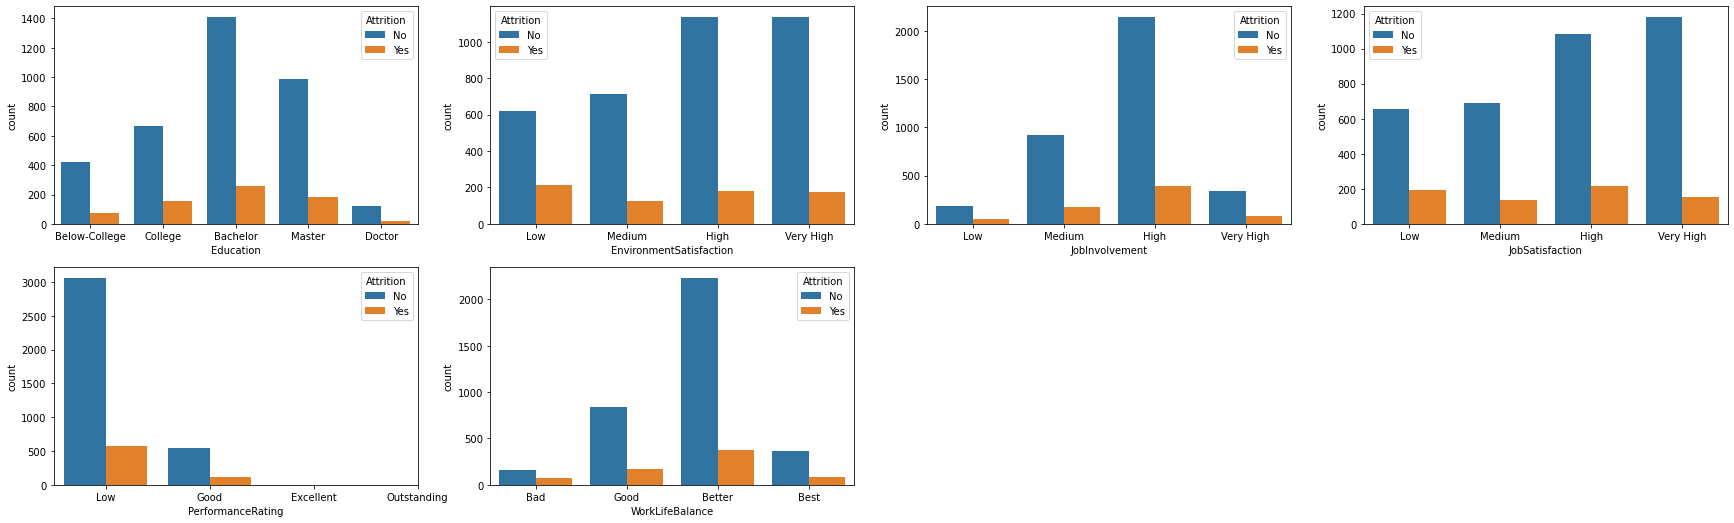

In [266]:
#2. chaning nums as x_ticks to   categorys as x_ticks
fig = plt.figure(figsize=(30,28))
for idx,i in enumerate(zip(cat1,val)):
    #crosstab = pd.crosstab(index=final_df[i[0]], columns=final_df["Attrition"])
    ax=plt.subplot(6,4,idx+1)
    #crosstab.plot(kind="bar",stacked=True,ax=ax)
    #sns.countplot(x=i[0],data=final_df,ax=ax)
    sns.countplot(final_df[i[0]],hue=final_df['Attrition'],ax=ax)
    ax.set(xticks=range(len(i[1])), xticklabels=[j for j in i[1]])
plt.show()

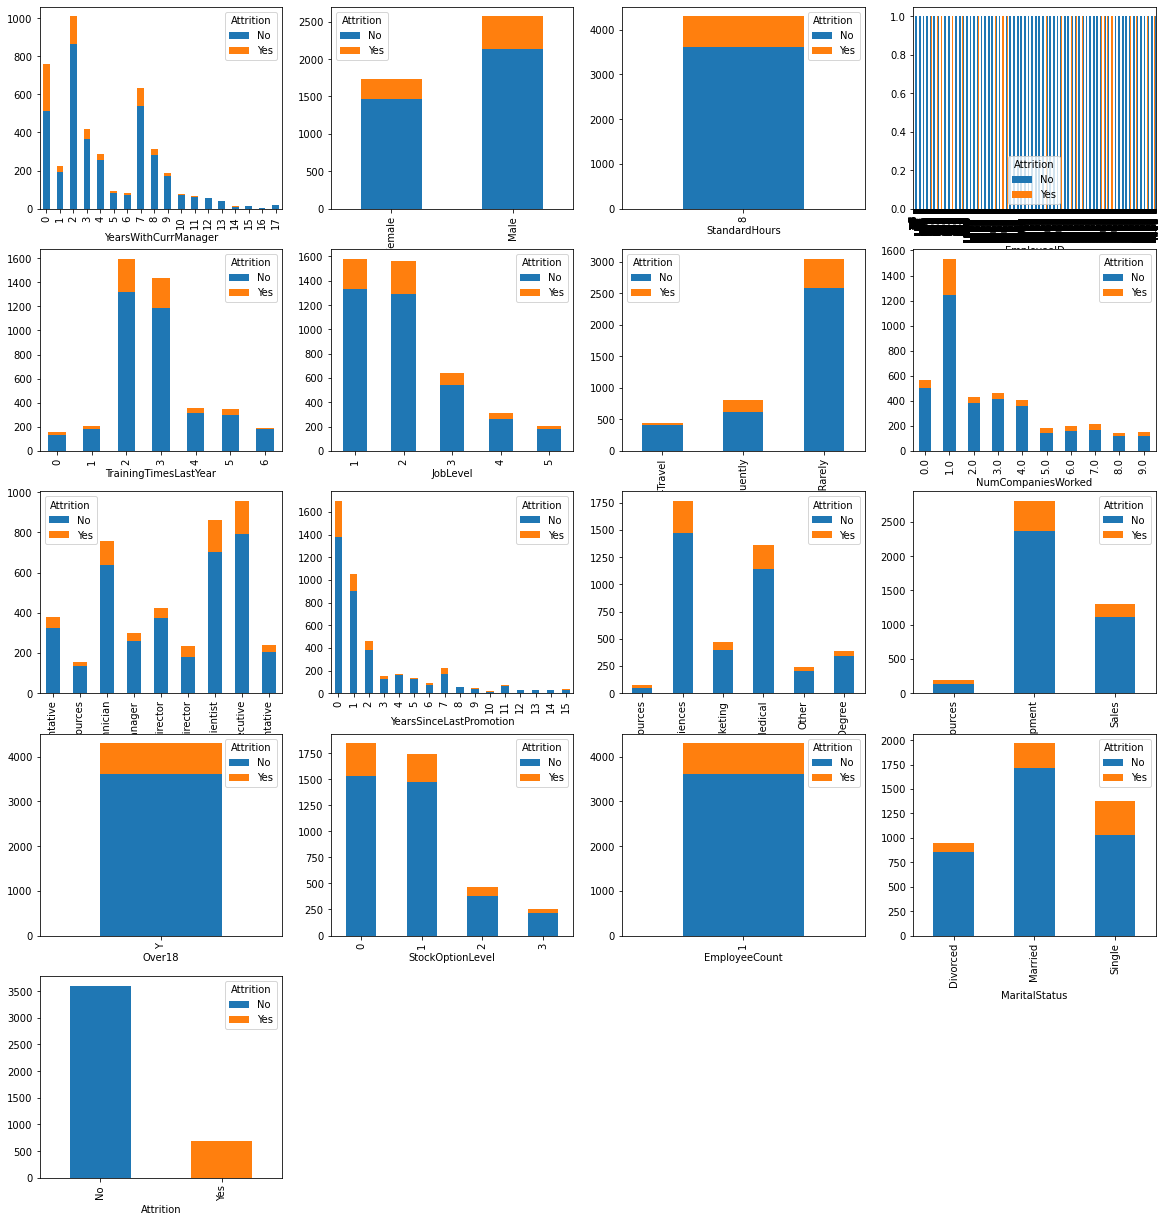

In [120]:
#Divide into CategoricalColumns
#1. with categorys as x_ticks
fig = plt.figure(figsize=(20,26))
for idx,i in enumerate(cat_col_eda):
    crosstab = pd.crosstab(index=final_df[i], columns=final_df["Attrition"])
    ax=plt.subplot(6,4,idx+1)
    crosstab.plot(kind="bar",stacked=True,ax=ax)
    #sns.countplot(x=i[0],data=final_df,ax=ax)
    #ax.set(xticks=range(len(i[1])), xticklabels=[j for j in i[1]])
plt.show()

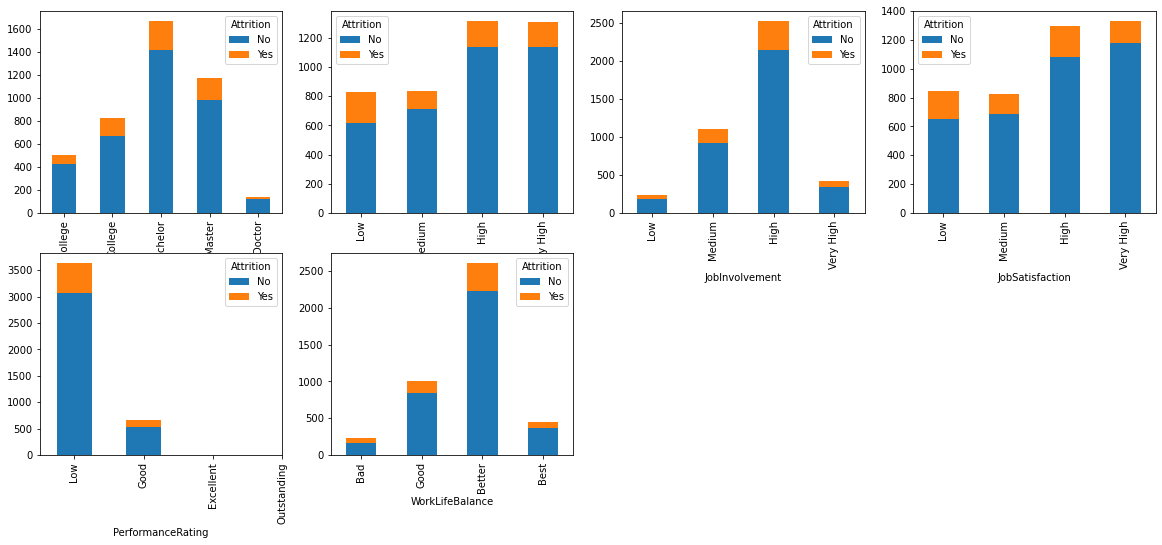

In [121]:
 #2. chaning nums as x_ticks to   categorys as x_ticks
fig = plt.figure(figsize=(20,26))
for idx,i in enumerate(zip(cat1,val)):
    crosstab = pd.crosstab(index=final_df[i[0]], columns=final_df["Attrition"])
    ax=plt.subplot(6,4,idx+1)
    crosstab.plot(kind="bar",stacked=True,ax=ax)
    #sns.countplot(x=i[0],data=final_df,ax=ax)
    ax.set(xticks=range(len(i[1])), xticklabels=[j for j in i[1]])
plt.show()

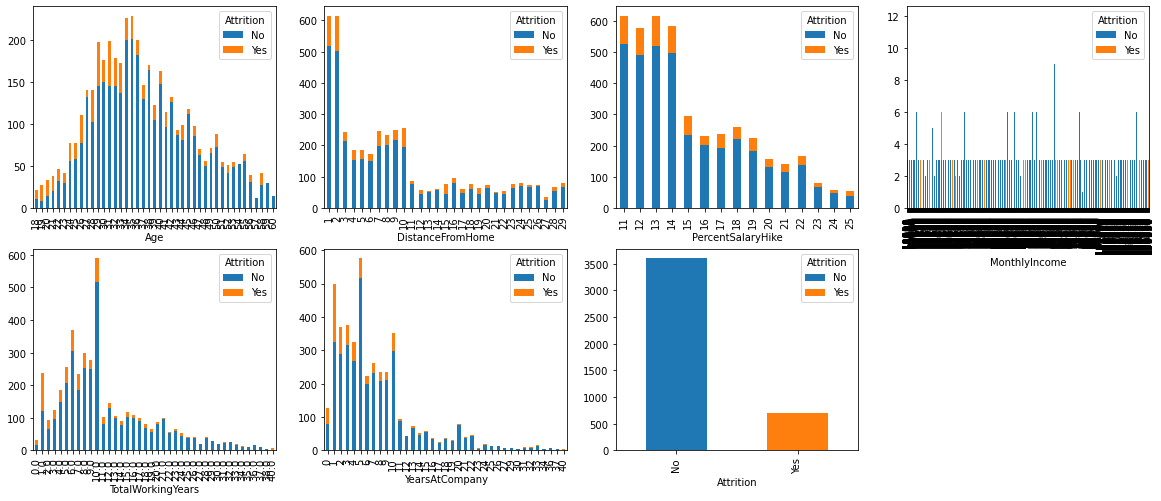

In [122]:
#for i in num_attrition:
fig = plt.figure(figsize=(20,26))
for idx,i in enumerate(num_attrition):
  crosstab = pd.crosstab(index=final_df[i], columns=final_df["Attrition"])
  ax=plt.subplot(6,4,idx+1)
    #sns.boxplot(x=i,data=final_df,ax=ax)
  
  crosstab.plot(kind="bar",stacked=True,ax=ax)

# OUTLIER Detection

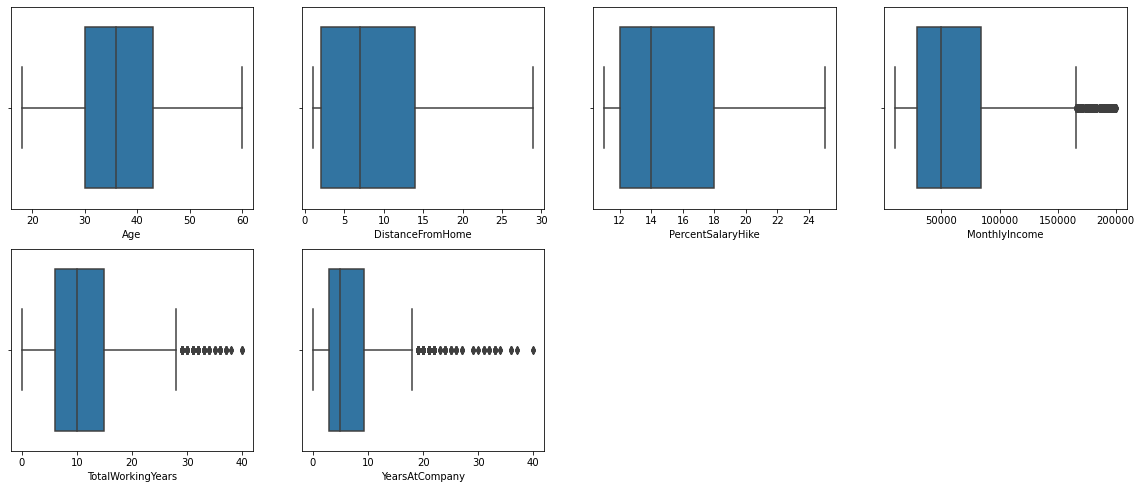

In [123]:
#Box Plot for finding "Outiler" in our data
fig = plt.figure(figsize=(20,26))
for idx,i in enumerate(num_col_eda):
    ax=plt.subplot(6,4,idx+1)
    sns.boxplot(x=i,data=final_df,ax=ax)

Results from Above Graph:
from above BoxPlot<br> Trying to find is there any outliers in Numerical columns <br>
can Observe outliers on MonthlyIncome , TotalWorkingYears and YearsAtCompany Columns<br>
from observing on that columns can say those columns some of values not outliers Because there is highly possibilites on<br> occuring those numerical values on those features or columns<br>

Feature Selection

In [403]:
final_df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,age_fs1
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3.0,4.0,2.0,3,3,40-60
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,3.0,2.0,4.0,2,4,20-40
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,2.0,2.0,1.0,3,3,20-40
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,4.0,4.0,3.0,2,3,20-40
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,4.0,1.0,3.0,3,3,20-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,2,6,1,5,3.0,4.0,3.0,2,3,20-40
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,5,3,0,2,4.0,1.0,3.0,3,3,40-60
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2,3,0,2,4.0,4.0,3.0,2,3,20-40
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,4,4,1,2,1.0,3.0,3.0,3,4,20-40


In [404]:
#newstr=""
final_df['age_fs1']=final_df['Age'].map(lambda x: "20-40" if(x<40) else "40-60")


# for i in final_df['age_fs1']:
#     for j in range(len(i)):
#         if j!=2:
#             newstr=newstr+j[i];
# print(newstr)
            
#if(final_df['age_fs1']==)

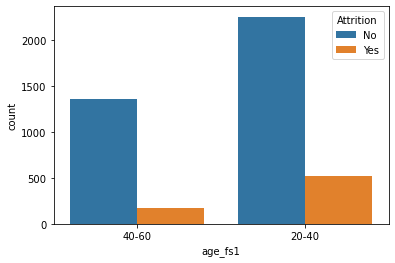

In [405]:
sns.countplot(final_df["age_fs1"],hue=final_df['Attrition'])
plt.show()

# Finding Coorelation
## Corelation on Numerical Features

<AxesSubplot:>

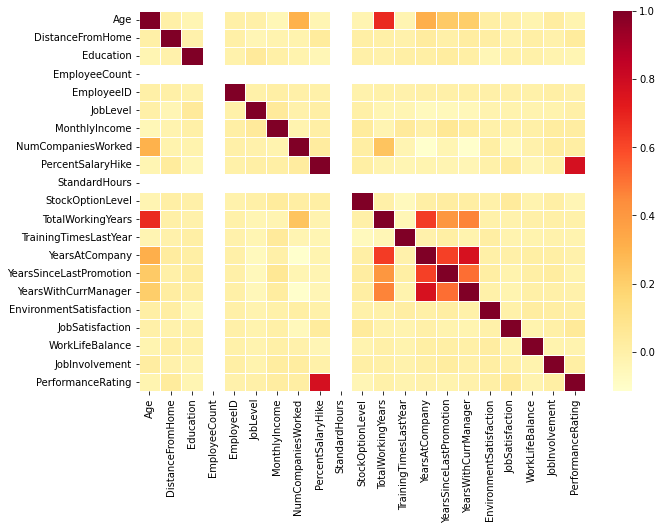

In [406]:
fig, ax = plt.subplots(figsize=(10,7))         # Sample figsize in inches

sns.heatmap(final_df.corr(),cmap='YlOrRd',linewidths=.5,ax=ax)

### There is is no higher dependency between column to columns from above heatMap Plot
Categorical Varibles Coorelation ::
ChiSquare Test for Independence ::
Hypothesis Testing Conditions ::
Our hypotheses will be:

Null Hypothesis (H0)

H0 :: There is no relationship between 2 categorival varibles ie .. Both features or varibles are independent of each other
Alternate Hypothesis (H1)

H1 :: There is Relationship between 2 categorical varibles .ie .. Both features or varibles are independent of each other

In [494]:
categorical=[i for i in final_df.columns.tolist() if(final_df[i].dtype==object)]
categorical.remove("Over18")

import scipy.stats
from scipy.stats import chi2
results=[]
lst=[]
#final=[]
input_features=[]
chisqr_result=[]
for i in categorical:
  #print("*"*6 + i + "*"*6)
    final=[]
    for j in categorical:
    #print("*"*6 + j + "*"*6)
    #print("*"*6 + i +"--" + j + "*"*6)
    #Contingency Table
        contingency_table=pd.crosstab(final_df[i],final_df[j])
    #print('contingency_table :-\n',contingency_table)
    
    #Observed Values
        Observed_Values = contingency_table.values
    #print("Observed Values :-\n",Observed_Values)
    
    #Expected Values
    #import scipy.stats
        b=scipy.stats.chi2_contingency(contingency_table)
        Expected_Values = b[3]
    #print("Expected Values :-\n",Expected_Values)


    #Degree of Freedom
        no_of_rows=Observed_Values.shape[0]
        no_of_columns=Observed_Values.shape[1]
        df=(no_of_rows-1)*(no_of_columns-1)
    #print("Degree of Freedom:-",df)

    #Significance Level 5%
        alpha=0.05


    #chi-square statistic - χ2
    #from scipy.stats import chi2
        chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
        chi_square_statistic=chi_square[0]+chi_square[1]
    #print("chi-square statistic:-",chi_square_statistic)


    #critical_value
        critical_value=chi2.ppf(q=1-alpha,df=df)
    #print('critical_value:',critical_value)

    #p-value
        p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
    #print('p-value:',p_value)


    #print('Significance level: ',alpha)
    #print('Degree of Freedom: ',df)
    #print('chi-square statistic:',chi_square_statistic)
    #print('critical_value:',critical_value)
    #print('p-value:',p_value)
    
    #lst1=[df,chi_square_statistic,critical_value,p_value]
        lst1=[df,chi_square_statistic,p_value]
    
    #compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
        if(chi_square_statistic>=critical_value):
      #print("Reject H0,There is a relationship between 2 categorical variables")
          test_stat=1
        else:
      #print("Retain H0,There is no relationship between 2 categorical variables")
          test_stat=0
    
        if(p_value<=alpha):
        ##print("Reject H0,There is a relationship between 2 categorical variables")
            p_val=1
        else:
        #print("Retain H0,There is no relationship between 2 categorical variables")
            p_val=0
        
        if((test_stat==1) and (p_val==1) ):
              final_output=1
        else:
              final_output=0
    
        lst.append(lst1)
        final.append(final_output)
        input_features.append((i,j))
    
    
    results.append(lst)
    chisqr_result.append(final)

print(input_features) 
print(results)
print(chisqr_result)

[('Attrition', 'Attrition'), ('Attrition', 'BusinessTravel'), ('Attrition', 'Department'), ('Attrition', 'EducationField'), ('Attrition', 'Gender'), ('Attrition', 'JobRole'), ('Attrition', 'MaritalStatus'), ('BusinessTravel', 'Attrition'), ('BusinessTravel', 'BusinessTravel'), ('BusinessTravel', 'Department'), ('BusinessTravel', 'EducationField'), ('BusinessTravel', 'Gender'), ('BusinessTravel', 'JobRole'), ('BusinessTravel', 'MaritalStatus'), ('Department', 'Attrition'), ('Department', 'BusinessTravel'), ('Department', 'Department'), ('Department', 'EducationField'), ('Department', 'Gender'), ('Department', 'JobRole'), ('Department', 'MaritalStatus'), ('EducationField', 'Attrition'), ('EducationField', 'BusinessTravel'), ('EducationField', 'Department'), ('EducationField', 'EducationField'), ('EducationField', 'Gender'), ('EducationField', 'JobRole'), ('EducationField', 'MaritalStatus'), ('Gender', 'Attrition'), ('Gender', 'BusinessTravel'), ('Gender', 'Department'), ('Gender', 'Educa

<AxesSubplot:>

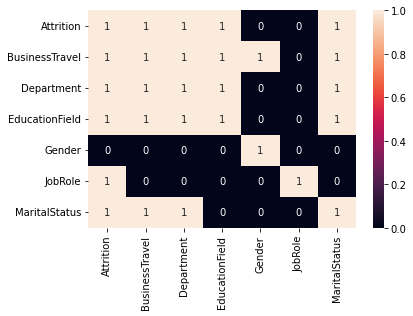

In [495]:
# plot the heatmap
sns.heatmap(chisqr_result, 
        xticklabels=categorical,
        yticklabels=categorical,annot=True)

In [496]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split


attrition_lable=final_df['Attrition']
final_df=final_df.drop('Attrition',1)

attrition_lable=attrition_lable.map(lambda x : 1 if(x=='Yes') else 0)


X_train, X_test, y_train, y_test = train_test_split(final_df,attrition_lable,test_size=0.20,stratify=attrition_lable, random_state=42)

In [497]:
#foe i in [X_train,X_cv,X_test]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)
  

In [498]:
from sklearn.tree import DecisionTreeClassifier

ml = DecisionTreeClassifier()
ml.fit(X_train, y_train)

DecisionTreeClassifier()

In [499]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
y_pred = ml.predict(X_test)

In [500]:
accuracy_score(y_test, y_pred)

0.9872093023255814

In [501]:
precision_score(y_test, y_pred)

0.9637681159420289

In [502]:
recall_score(y_test, y_pred)

0.9568345323741008

In [503]:
f1_score(y_test, y_pred)

0.9602888086642598

In [504]:
from sklearn.metrics import classification_report

In [505]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       721
           1       0.96      0.96      0.96       139

    accuracy                           0.99       860
   macro avg       0.98      0.97      0.98       860
weighted avg       0.99      0.99      0.99       860



# Notes:

1) The performance of developed model is excellent and it can be deployed to predict future employee attrition.

2) We found a lot of insights about employee attrition during EDA.

3) Few major caused of employee attrition includes human resource work, bad work life balance, frequent travels and unmarried employees. So, in order to reduce attrition company should focus on these reasons.

In [419]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()

In [420]:
# fit the model with the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [421]:
predict_test = model.predict(X_test)
predict_test

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [422]:
testaccuracy = accuracy_score(y_test, predict_test)
print('accuracy_score on test dataset : ', testaccuracy)

accuracy_score on test dataset :  0.9965116279069768


In [423]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.tail()

,Features,VIF
16,EnvironmentSatisfaction,1.01
4,EmployeeID,1.01
9,StandardHours,0.00
3,EmployeeCount,0.00
47,Over18_Y,0.00


In [424]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, predict_test )
print(confusion)

[[721   0]
 [  3 136]]


In [425]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [426]:
# Let's see the sensitivity of our model
testsensitivity= TP / float(TP+FN)
testsensitivity

0.9784172661870504

In [427]:
# Let us calculate specificity
testspecificity= TN / float(TN+FP)
testspecificity

1.0

In [428]:
# Calculate false postive rate - predicting Attrition when customer does not have Attrited
print(FP/ float(TN+FP))

0.0


In [429]:
# Positive predictive value 
print (TP / float(TP+FP))

1.0


In [430]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, predict_test)

1.0

In [431]:
recall_score(y_test, predict_test)

0.9784172661870504

In [432]:
print("Test Data Accuracy     :{} %".format(round((testaccuracy*100),2)))
print("Test Data Sensitivity  :{} %".format(round((testsensitivity*100),2)))
print("Test Data Specificity  :{} %".format(round((testspecificity*100),2)))

Test Data Accuracy     :99.65 %
Test Data Sensitivity  :97.84 %
Test Data Specificity  :100.0 %


In [506]:
# "Support Vector Classifier"
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 

In [507]:
clf.fit(X_train, y_train) 

SVC(kernel='linear')

In [508]:
predict_test_clf = clf.predict(X_test)
predict_test_clf

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [509]:
testaccuracy_clf = accuracy_score(y_test, predict_test_clf)
print('accuracy_score on test dataset : ', testaccuracy_clf)

accuracy_score on test dataset :  0.8348837209302326


In [510]:
f1_score(y_test, predict_test_clf)

0.14457831325301204

In [511]:
recall_score(y_test, predict_test_clf)

0.08633093525179857

In [513]:
precision_score(y_test, predict_test_clf)

0.4444444444444444

In [514]:
#KNN

In [515]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns

K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [439]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.8627906976744186, 0.8162790697674419]
3 : [0.8593023255813953, 0.7779069767441861]
4 : [0.8453488372093023, 0.8302325581395349]
5 : [0.8441860465116279, 0.8127906976744186]
6 : [0.8404069767441861, 0.8325581395348837]
7 : [0.8421511627906977, 0.8267441860465117]
8 : [0.8401162790697675, 0.8383720930232558]
9 : [0.8404069767441861, 0.8348837209302326]
10 : [0.8395348837209302, 0.8383720930232558]
11 : [0.8415697674418605, 0.8383720930232558]
12 : [0.8392441860465116, 0.8395348837209302]
13 : [0.8395348837209302, 0.8383720930232558]
14 : [0.8392441860465116, 0.8395348837209302]
15 : [0.8392441860465116, 0.8395348837209302]
16 : [0.8386627906976745, 0.8395348837209302]
17 : [0.8398255813953488, 0.8383720930232558]
18 : [0.8386627906976745, 0.8395348837209302]
19 : [0.838953488372093, 0.8395348837209302]
20 : [0.8383720930232558, 0.8383720930232558]


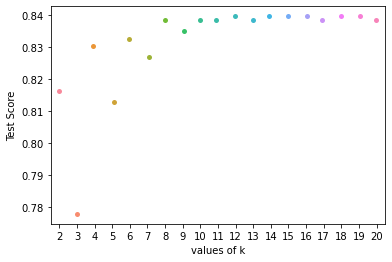

In [440]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

In [441]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
final_df["BusinessTravel"] = le.fit_transform(final_df["BusinessTravel"])
final_df["Department"] = le.fit_transform(final_df["Department"])
final_df["EducationField"] = le.fit_transform(final_df["EducationField"])
final_df["Gender"] = le.fit_transform(final_df["Gender"])
#final_df["Attrition"] = le.fit_transform(final_df["Attrition"])
final_df["JobRole"] = le.fit_transform(final_df["JobRole"])
final_df["MaritalStatus"] = le.fit_transform(final_df["MaritalStatus"])
final_df["Over18"] = le.fit_transform(final_df["Over18"])

In [456]:
final_df1=final_df.drop('age_fs1',axis=1,inplace=True)

In [457]:
final_df

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,2,2,6,2,1,1,1,0,1,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,1,1,10,1,1,1,2,0,1,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,1,1,17,4,4,1,3,1,4,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,0,1,2,5,1,1,4,1,3,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,2,1,10,1,3,1,5,1,1,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,2,2,4,3,4,1,4405,0,2,...,6.0,2,6,1,5,3.0,4.0,3.0,2,3
4405,42,2,1,5,4,3,1,4406,0,1,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,2,1,2,4,3,1,4407,1,1,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,2,1,25,2,1,1,4408,1,2,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4


In [458]:
from sklearn.preprocessing import normalize 
X_normalized=normalize(final_df,axis=0)

In [459]:
total_length=len(final_df)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

In [461]:
X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=attrition_lable[:train_length]
y_test=attrition_lable[train_length:]

In [462]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train,num_classes=2)
y_test=np_utils.to_categorical(y_test,num_classes=2)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (3440, 2)
Shape of y_test (860, 2)


In [463]:
#Neural network module
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Activation,Dropout 
from tensorflow.keras.layers import BatchNormalization 

In [464]:
model=Sequential()
model.add(Dense(1000,input_dim=28,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [465]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              29000     
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 300)               150300    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 602       
                                                                 
Total params: 680,402
Trainable params: 680,402
Non-trainable params: 0
_________________________________________________________________


In [466]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
172/172 [==============================] - 4s 8ms/step - loss: 0.4441 - accuracy: 0.8363 - val_loss: 0.4037 - val_accuracy: 0.8465
Epoch 2/10
172/172 [==============================] - 1s 6ms/step - loss: 0.4168 - accuracy: 0.8363 - val_loss: 0.3872 - val_accuracy: 0.8465
Epoch 3/10
172/172 [==============================] - 1s 6ms/step - loss: 0.4100 - accuracy: 0.8363 - val_loss: 0.3957 - val_accuracy: 0.8465
Epoch 4/10
172/172 [==============================] - 1s 5ms/step - loss: 0.3998 - accuracy: 0.8384 - val_loss: 0.3782 - val_accuracy: 0.8465
Epoch 5/10
172/172 [==============================] - 1s 6ms/step - loss: 0.3906 - accuracy: 0.8430 - val_loss: 0.4726 - val_accuracy: 0.7535
Epoch 6/10
172/172 [==============================] - 1s 6ms/step - loss: 0.3924 - accuracy: 0.8474 - val_loss: 0.3893 - val_accuracy: 0.8477
Epoch 7/10
172/172 [==============================] - 1s 6ms/step - loss: 0.3919 - accuracy: 0.8448 - val_loss: 0.3713 - val_accuracy: 0.8488
Epoch 

In [480]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred=np.argmax(model.predict(X_test),axis=1)
print('confusion matrix')
print(confusion_matrix(y_test_arg,Y_pred))
#print(classification_report(y_test,Y_pred))
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

27/27 [==============================] - 0s 3ms/step
confusion matrix
[[721   7]
 [123   9]]
27/27 [==============================] - 0s 4ms/step
Accuracy of the dataset 84.88372093023256
